---
## 05_Visualization_Analysis
---

In [1]:
# Imports

# Core
import os
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Optionals (interactive / maps if needed later)
import plotly.express as px
import geodatasets
import geopandas as gpd

In [2]:
# Load composite scores
equal_path = "../data/scored/equal_scores.csv"
weighted_path = "../data/scored/weighted_scores.csv"

equal_df = pd.read_csv(equal_path)
weighted_df = pd.read_csv(weighted_path)

# Africa filter
africa_countries = [
    "Algeria","Angola","Benin","Botswana","Burkina Faso","Burundi","Cabo Verde",
    "Cameroon","Central African Republic","Chad","Comoros","Congo, Dem. Rep.",
    "Congo, Rep.","Cote d'Ivoire","Djibouti","Egypt, Arab Rep.","Equatorial Guinea",
    "Eritrea","Eswatini","Ethiopia","Gabon","Gambia, The","Ghana","Guinea",
    "Guinea-Bissau","Kenya","Lesotho","Liberia","Libya","Madagascar","Malawi",
    "Mali","Mauritania","Mauritius","Morocco","Mozambique","Namibia","Niger",
    "Nigeria","Rwanda","Sao Tome and Principe","Senegal","Seychelles","Sierra Leone",
    "Somalia","South Africa","South Sudan","Sudan","Tanzania","Togo","Tunisia",
    "Uganda","Zambia","Zimbabwe"
]

equal_africa = equal_df[equal_df["Country Name"].isin(africa_countries)]
weighted_africa = weighted_df[weighted_df["Country Name"].isin(africa_countries)]

print(equal_africa.shape, weighted_africa.shape)

(54, 12) (54, 12)


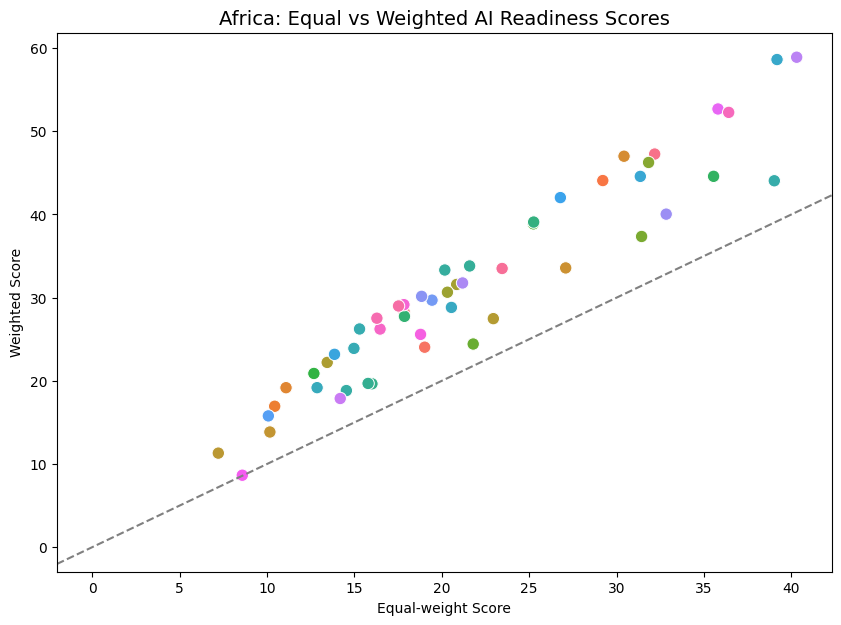

Scatter plot saved to ../images/africa_equal_vs_weighted_scatter.png


In [3]:
# Merge equal & weighted on Country Code
africa_compare = equal_africa.merge(
    weighted_africa,
    on="Country Code",
    suffixes=("_equal","_weighted")
)

# Create scatter
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=africa_compare,
    x="AI_Readiness_Score_equal",
    y="AI_Readiness_Score_weighted",
    hue="Country Name_equal",
    legend=False,
    s=80
)
plt.title("Africa: Equal vs Weighted AI Readiness Scores", fontsize=14)
plt.xlabel("Equal-weight Score")
plt.ylabel("Weighted Score")

# Line of equality
plt.axline((0,0), slope=1, color="gray", linestyle="--")

# Save to images folder
out_path = "../images/africa_equal_vs_weighted_scatter.png"
plt.savefig(out_path, bbox_inches="tight", dpi=300)

plt.show()
print(f"Scatter plot saved to {out_path}")

---
## Notes of Equal vs Weighted AFI Readiness
---
-- Here’s how to read the Africa Equal vs Weighted Scatter you just saved:

X-axis: Equal-weighted scores (every indicator counts the same).

Y-axis: Weighted scores (governance, GDP, and literacy matter more).

Diagonal gray line: Countries on this line would have no change between methods.

-- Key Interpretations

-- Above the line → countries that gain when weights are applied.

Stronger economies, higher governance effectiveness, and higher literacy benefit from weighting.

Example: South Africa, Mauritius, and Morocco likely push upward.

-- Below the line → countries that lose when weights are applied.

Their equal-score looked decent, but weaker governance or lower GDP drags them down once weighting kicks in.

Example: Some smaller West and Central African nations will appear here.

Spread of points → shows how sensitive readiness is to weighting.

-- Tight clustering near the line = little change.

Large vertical shifts = big difference depending on method.

C:\Users\User\AppData\Local\Temp\ipykernel_28920\2438579247.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  africa_map["coords"] = africa_map["geometry"].centroid


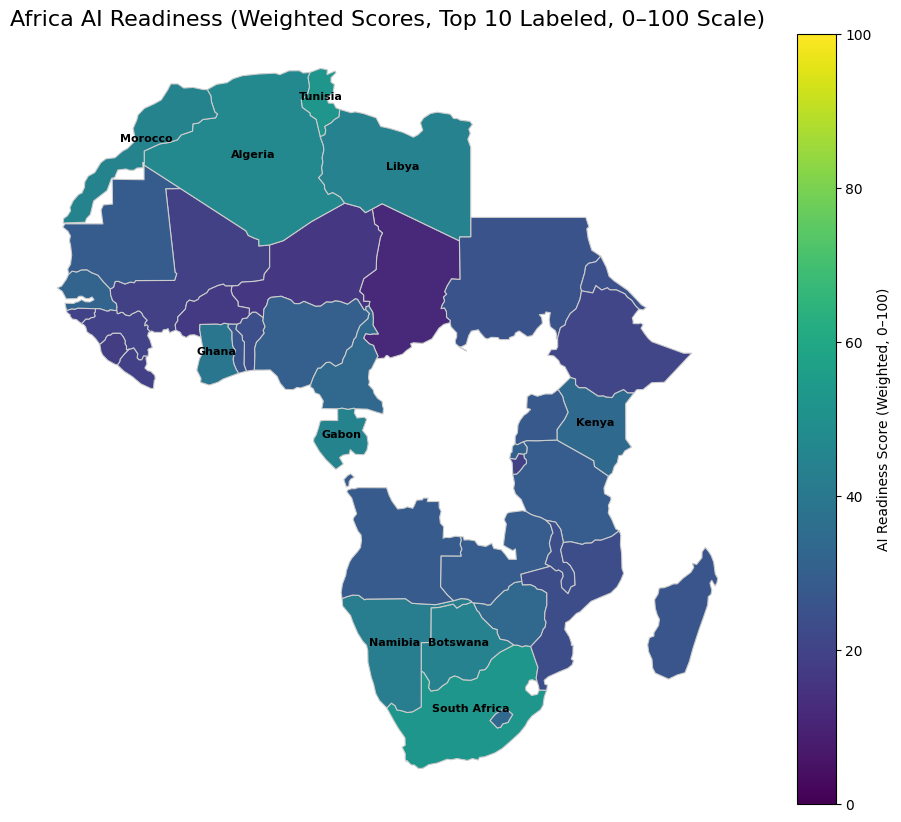

Choropleth with Top 10 labels & 0–100 scale saved to ../images/africa_weighted_map_top10_globalscale.png


In [4]:
# Top 10 by weighted score
# Path to your Admin 0 Countries shapefile (NOT the land shapefile)
shapefile_path = r"C:\Users\User\Repos\gas\projects\Cap\Panafai\data\ne_110m_admin_0_countries.shp"
countries = gpd.read_file(shapefile_path)

# Filter to Africa
africa_map = countries[countries["CONTINENT"] == "Africa"].copy()

# Merge with weighted Africa scores
africa_map = africa_map.merge(
    weighted_africa,
    left_on="NAME",         # shapefile country names
    right_on="Country Name",# your dataset names
    how="left"
)

# Calculate centroids for labeling
africa_map["coords"] = africa_map["geometry"].centroid

# Select top 10 by weighted AI readiness score
top10 = africa_map.nlargest(10, "AI_Readiness_Score")

# Plot choropleth with global 0–100 scale
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
africa_map.plot(
    column="AI_Readiness_Score",
    cmap="viridis",
    linewidth=0.8,
    edgecolor="0.8",
    vmin=0, vmax=100,   # <-- Force full 0–100 scale
    legend=True,
    legend_kwds={'label': "AI Readiness Score (Weighted, 0–100)", 'orientation': "vertical"},
    ax=ax
)

# Add labels only for top 10
for idx, row in top10.iterrows():
    plt.annotate(
        text=row["Country Name"], 
        xy=(row["coords"].x, row["coords"].y),
        ha="center",
        fontsize=8,
        fontweight="bold",
        color="black"
    )

ax.set_title("Africa AI Readiness (Weighted Scores, Top 10 Labeled, 0–100 Scale)", fontsize=16)
ax.axis("off")

# Save image
out_path = "../images/africa_weighted_map_top10_globalscale.png"
plt.savefig(out_path, bbox_inches="tight", dpi=300)
plt.show()

print(f"Choropleth with Top 10 labels & 0–100 scale saved to {out_path}")

C:\Users\User\AppData\Local\Temp\ipykernel_28920\4022749619.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  africa_map["coords"] = africa_map["geometry"].centroid


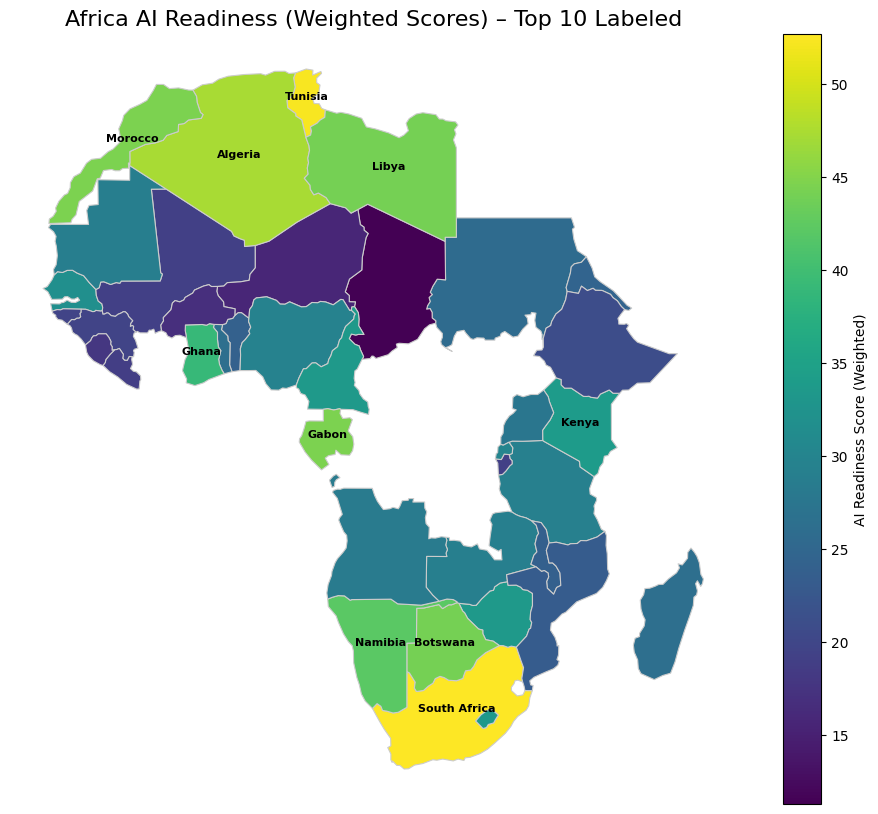

Choropleth with Top 10 labels saved to ../images/africa_weighted_map_top10.png


In [5]:
# Top 10 by weighted score Africa zoomed in. 
# Calculate centroids for labeling
africa_map["coords"] = africa_map["geometry"].centroid

# Select top 10 by weighted AI readiness score
top10 = africa_map.nlargest(10, "AI_Readiness_Score")

# Plot choropleth
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
africa_map.plot(
    column="AI_Readiness_Score",
    cmap="viridis",
    linewidth=0.8,
    edgecolor="0.8",
    legend=True,
    legend_kwds={'label': "AI Readiness Score (Weighted)", 'orientation': "vertical"},
    ax=ax
)

# Add labels only for top 10
for idx, row in top10.iterrows():
    plt.annotate(
        text=row["Country Name"], 
        xy=(row["coords"].x, row["coords"].y),
        ha="center",
        fontsize=8,
        fontweight="bold",
        color="black"
    )

ax.set_title("Africa AI Readiness (Weighted Scores) – Top 10 Labeled", fontsize=16)
ax.axis("off")

# Save image
out_path = "../images/africa_weighted_map_top10.png"
plt.savefig(out_path, bbox_inches="tight", dpi=300)
plt.show()

print(f"Choropleth with Top 10 labels saved to {out_path}")

C:\Users\User\AppData\Local\Temp\ipykernel_28920\1938829995.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


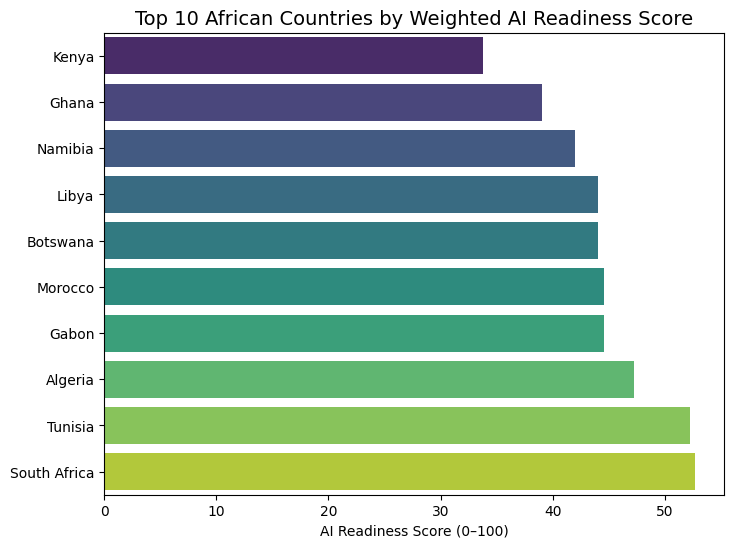

Bar chart saved to ../images/africa_top10_weighted_bar.png


In [6]:
# Extract Top 10 again (sorted high → low)
top10_sorted = africa_map.nlargest(10, "AI_Readiness_Score").sort_values("AI_Readiness_Score", ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(8,6))
sns.barplot(
    data=top10_sorted,
    x="AI_Readiness_Score",
    y="Country Name",
    palette="viridis"
)

plt.title("Top 10 African Countries by Weighted AI Readiness Score", fontsize=14)
plt.xlabel("AI Readiness Score (0–100)")
plt.ylabel("")

# Save
out_path = "../images/africa_top10_weighted_bar.png"
plt.savefig(out_path, bbox_inches="tight", dpi=300)
plt.show()

print(f"Bar chart saved to {out_path}")

In [7]:
# Load yearly weighted scores
yearly_weighted = pd.read_csv("../data/scored/yearly_weighted_scores.csv")

print("Yearly weighted scores shape:", yearly_weighted.shape)
display(yearly_weighted.head())

Yearly weighted scores shape: (9560, 4)


,Country Name,Country Code,Year,Weighted_Score
0,Afghanistan,AFG,1990.0,0.295835
1,Afghanistan,AFG,1991.0,0.295835
2,Afghanistan,AFG,1992.0,0.295835
3,Afghanistan,AFG,1993.0,0.295835
4,Afghanistan,AFG,1994.0,0.295835


Top 10 African countries by latest weighted score: ['Seychelles', 'Mauritius', 'Botswana', 'Morocco', 'South Africa', 'Cabo Verde', 'Tunisia', 'Namibia', 'Gabon', 'Algeria']


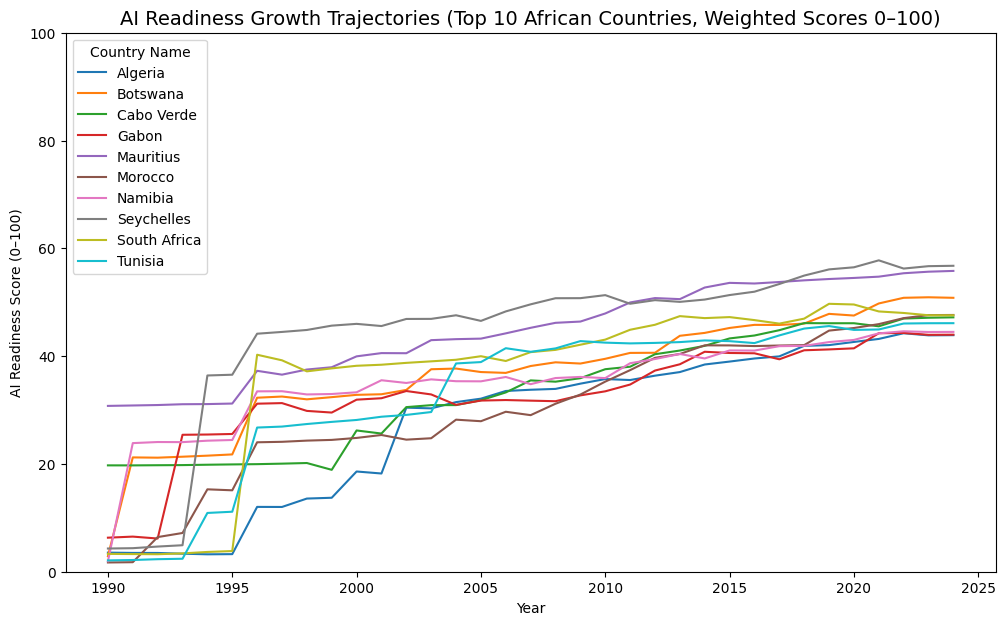

Trajectory chart saved to ../images/africa_growth_trajectories_top10.png


In [8]:
# Define African country list
africa_countries = [
    "Algeria","Angola","Benin","Botswana","Burkina Faso","Burundi","Cabo Verde",
    "Cameroon","Central African Republic","Chad","Comoros","Congo, Dem. Rep.",
    "Congo, Rep.","Cote d'Ivoire","Djibouti","Egypt, Arab Rep.","Equatorial Guinea",
    "Eritrea","Eswatini","Ethiopia","Gabon","Gambia, The","Ghana","Guinea",
    "Guinea-Bissau","Kenya","Lesotho","Liberia","Libya","Madagascar","Malawi",
    "Mali","Mauritania","Mauritius","Morocco","Mozambique","Namibia","Niger",
    "Nigeria","Rwanda","Sao Tome and Principe","Senegal","Seychelles","Sierra Leone",
    "Somalia","South Africa","South Sudan","Sudan","Tanzania","Togo","Tunisia",
    "Uganda","Zambia","Zimbabwe"
]

# Filter to Africa only
africa_df = yearly_weighted[yearly_weighted["Country Name"].isin(africa_countries)]

# Select latest year
latest_year = africa_df["Year"].max()

# Get Top 10 African countries by most recent weighted score
top10_names = (
    africa_df[africa_df["Year"] == latest_year]
    .nlargest(10, "Weighted_Score")["Country Name"]
    .tolist()
)

print("Top 10 African countries by latest weighted score:", top10_names)

# Filter to Top 10 only
top10_df = africa_df[africa_df["Country Name"].isin(top10_names)]

# Plot trajectories
plt.figure(figsize=(12,7))
sns.lineplot(
    data=top10_df,
    x="Year",
    y="Weighted_Score",
    hue="Country Name"
)

plt.title("AI Readiness Growth Trajectories (Top 10 African Countries, Weighted Scores 0–100)", fontsize=14)
plt.ylabel("AI Readiness Score (0–100)")
plt.xlabel("Year")
plt.ylim(0, 100)  # lock y-axis to 0–100

# Save
out_path = "../images/africa_growth_trajectories_top10.png"
plt.savefig(out_path, bbox_inches="tight", dpi=300)
plt.show()

print(f"Trajectory chart saved to {out_path}")

## Summary – 05_Visualization_Analysis

In this notebook we built the visual foundation of the AI Readiness Index, with a focus on Africa. The goal was to create compelling investor-facing visuals that balance transparency (how scores are built) with narrative clarity (why Africa’s trajectory matters).

### What we did
1. **Scatterplot (Equal vs Weighted Scores)**  
   - Showed how methodology shifts results.  
   - Demonstrated that weighting governance, GDP, and literacy changes country rankings meaningfully.  

2. **Africa Maps**  
   - Global 0–100 scale map: positioned Africa relative to the rest of the world (currently “halfway there”).  
   - Africa-only scale map: zoomed in to highlight relative leaders and laggards inside the continent.  

3. **Top 10 Bar Chart**  
   - Identified the ten most ready African countries (latest year).  
   - Anchored the leadership narrative with concrete numbers.  

4. **Growth Trajectories (Top 10 Countries)**  
   - Built a panel from yearly weighted scores.  
   - Initially showed a false “cliff” at 2024, traced back to missing indicator coverage.  
   - Fixed by forward-filling last available values per indicator to maintain consistency with the snapshot method.  
   - Final trajectories now show steady growth and alignment with snapshot scores.  

### Grows (Strengths)
- Created a strong, diversified visual package: methodology (scatter), context (maps), leaders (bar), and momentum (trajectories).  
- Demonstrated transparency by uncovering and explaining the 2024 drop issue.  
- Aligned snapshot and trajectory logic, making the investor story consistent.  
- Positioned Africa not as “behind,” but as “halfway there with strong growth runway.”  

### Glows (Challenges we worked through)
- Discovered discrepancies between snapshot and yearly scores due to uneven data coverage.  
- Identified that high-weight indicators (GDP PPP, governance, literacy) drop out in later years, artificially dragging scores.  
- Corrected this with forward-fill logic, acknowledging trade-offs: stability and comparability > raw strictness.  

### Why this matters
Notebook 05 closes the loop on the “storytelling layer.” By surfacing both the clean visuals and the messy data realities, it sets up the next stage (06_Clustering & Trajectories) with honesty and clarity. We can now show not just *who leads* and *where Africa stands*, but also *how groups of countries are evolving together over time*.  